# Evaluating the Results



## Quick look at the data

Just as a quick reference to remember which columns are available.
Double check for stupid mistakes.

In [1]:
import pandas as pd
from _conf import SIMPLIFIED_RESULTS, PUBLIC_DATA

results = pd.read_json(SIMPLIFIED_RESULTS)
results["opt_gap"] = (results["objective"] - results["lower_bound"]) / results[
    "objective"
]
results["strategy"].replace(
    {
        "GurobiTspSolver": "Dantzig (Gurobi)",
        "CpSatTspSolverV1": "AddCircuit",
        "CpSatTspSolverDantzig": "Iterative Dantzig",
        "CpSatTspSolverMtz": "Miller-Tucker-Zemlin",
    },
    inplace=True,
)
results["opt"] = results["opt_gap"] <= 0.001
results.sort_values(["num_nodes", "instance_name"])

,instance_name,num_nodes,time_limit,strategy,opt_tol,runtime,objective,lower_bound,opt_gap,opt
1985,random_euclidean_25_0,25,90,Dantzig (Gurobi),0.001,0.048017,9.636744e+07,96367438.0,0.000000,True
1986,random_euclidean_25_0,25,90,Dantzig (Gurobi),0.010,0.046579,9.636744e+07,96367438.0,0.000000,True
1987,random_euclidean_25_0,25,90,Dantzig (Gurobi),0.050,0.024580,9.636744e+07,96367438.0,0.000000,True
1988,random_euclidean_25_0,25,90,Dantzig (Gurobi),0.100,0.015548,9.636744e+07,96367438.0,0.000000,True
1989,random_euclidean_25_0,25,90,Dantzig (Gurobi),0.250,0.007838,1.216670e+08,94403263.0,0.224085,False
...,...,...,...,...,...,...,...,...,...,...
358,random_euclidean_500_9,500,90,Miller-Tucker-Zemlin,0.001,100.248195,9.412218e+09,66738473.0,0.992909,False
359,random_euclidean_500_9,500,90,Miller-Tucker-Zemlin,0.010,104.222358,1.151326e+10,66738473.0,0.994203,False
360,random_euclidean_500_9,500,90,Miller-Tucker-Zemlin,0.050,99.913106,7.924827e+09,66738473.0,0.991579,False
361,random_euclidean_500_9,500,90,Miller-Tucker-Zemlin,0.100,200.734578,9.848627e+09,66738473.0,0.993224,False


In [2]:
t = results.sort_values(["num_nodes", "instance_name"])
t[t["opt_tol"] == 0.001]

,instance_name,num_nodes,time_limit,strategy,opt_tol,runtime,objective,lower_bound,opt_gap,opt
1985,random_euclidean_25_0,25,90,Dantzig (Gurobi),0.001,0.048017,9.636744e+07,9.636744e+07,0.000000,True
1990,random_euclidean_25_0,25,90,AddCircuit,0.001,0.243726,9.636744e+07,9.636744e+07,0.000000,True
1995,random_euclidean_25_0,25,90,Iterative Dantzig,0.001,0.222666,9.636744e+07,9.636744e+07,0.000000,True
2000,random_euclidean_25_0,25,90,Miller-Tucker-Zemlin,0.001,0.644817,9.636744e+07,9.636744e+07,0.000000,True
2005,random_euclidean_25_1,25,90,Dantzig (Gurobi),0.001,0.024823,9.077355e+07,9.077355e+07,0.000000,True
...,...,...,...,...,...,...,...,...,...,...
338,random_euclidean_500_8,500,90,Miller-Tucker-Zemlin,0.001,100.883436,8.984455e+09,6.272751e+07,0.993018,False
343,random_euclidean_500_9,500,90,Dantzig (Gurobi),0.001,70.489049,7.378162e+07,7.371034e+07,0.000966,True
348,random_euclidean_500_9,500,90,AddCircuit,0.001,95.834668,3.011006e+08,6.539077e+07,0.782828,False
353,random_euclidean_500_9,500,90,Iterative Dantzig,0.001,108.669239,1.596116e+10,7.176012e+07,0.995504,False


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

## Looking at the runtime

We can take a quick look at the runtime of the different models.
This is a good sanity check to see if the models are actually running.
However, you will notice the sigmoidal shape of the runtime.
The instances do not suddenly get easier, but the runtime is limited by the timeout.
The true runtime can be expected to be an exponential curve.
For this reason, this is not a good metric to compare the models and may be misleading.

runtime
num_nodes strategy                        
25        AddCircuit              0.073352
          Dantzig (Gurobi)        0.032130
          Iterative Dantzig       0.248574
          Miller-Tucker-Zemlin    0.409975
50        AddCircuit              0.442609
          Dantzig (Gurobi)        0.114854
          Iterative Dantzig      24.349491
          Miller-Tucker-Zemlin   10.097673
75        AddCircuit              1.952957
          Dantzig (Gurobi)        0.220298
          Iterative Dantzig      76.774528
          Miller-Tucker-Zemlin   68.858994
100       AddCircuit              8.060139
          Dantzig (Gurobi)        0.470333
          Iterative Dantzig      82.334937
          Miller-Tucker-Zemlin   86.986115
150       AddCircuit             30.369175
          Dantzig (Gurobi)        1.140127
          Iterative Dantzig      91.048224
          Miller-Tucker-Zemlin   91.513630
200       AddCircuit             77.763684
          Dantzig (Gurobi)        2.732445
          Iterative Dantzig      91.698779
          Miller-Tucker-Zemlin   94.195183
250       AddCircuit             91.700525
          Dantzig (Gurobi)        8.670386
          Iterative Dantzig      91.921212
          Miller-Tucker-Zemlin  101.799496
300       AddCircuit             92.403233
          Dantzig (Gurobi)       11.126396
          Iterative Dantzig     103.828611
          Miller-Tucker-Zemlin  120.046600
350       AddCircuit             93.068392
          Dantzig (Gurobi)       24.867971
          Iterative Dantzig     122.044434
          Miller-Tucker-Zemlin  132.205184
400       AddCircuit             93.853760
          Dantzig (Gurobi)       49.211782
          Iterative Dantzig     115.309117
          Miller-Tucker-Zemlin  191.991516
450       AddCircuit             94.895319
          Dantzig (Gurobi)       60.149384
          Iterative Dantzig     126.163162
          Miller-Tucker-Zemlin  408.444933
500       AddCircuit             95.791659
          Dantzig (Gurobi)       66.626697
          Iterative Dantzig     126.472907
          Miller-Tucker-Zemlin  101.228467

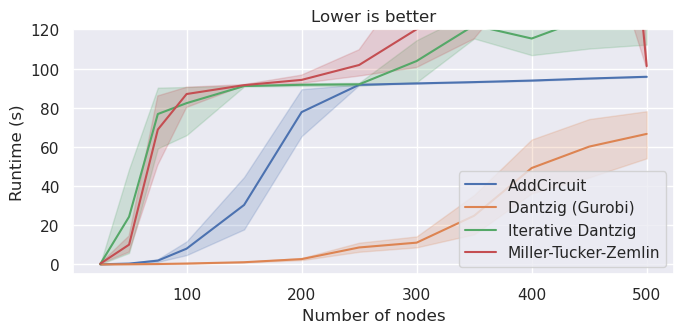

In [4]:
from IPython.display import display

t = results.sort_values(["num_nodes", "instance_name"])
t = t[t["opt_tol"] == 0.001]
display(t.groupby(["num_nodes", "strategy"])[["runtime"]].mean())
plt.figure(figsize=(7, 3.5))
sns.lineplot(data=t.sort_values("strategy"), x="num_nodes", y="runtime", hue="strategy")
plt.ylabel("Runtime (s)")
plt.title("Lower is better")
plt.legend(loc="lower right")
plt.xlabel("Number of nodes")
plt.ylim(-5, 120)
plt.tight_layout()
plt.savefig(PUBLIC_DATA / "runtime.png")
plt.show()

## Plotting how many instances could still be solved to optimality

This is a more interesting metric.
Suddenly, we also see some differences between the `CpSatTspSolverMtz` and `CpSatTspSolverDantzig` models.


opt_perc
num_nodes strategy                      
25        AddCircuit               100.0
          Dantzig (Gurobi)         100.0
          Iterative Dantzig        100.0
          Miller-Tucker-Zemlin     100.0
50        AddCircuit               100.0
          Dantzig (Gurobi)         100.0
          Iterative Dantzig         90.0
          Miller-Tucker-Zemlin     100.0
75        AddCircuit               100.0
          Dantzig (Gurobi)         100.0
          Iterative Dantzig         70.0
          Miller-Tucker-Zemlin      40.0
100       AddCircuit               100.0
          Dantzig (Gurobi)         100.0
          Iterative Dantzig        100.0
          Miller-Tucker-Zemlin      10.0
150       AddCircuit               100.0
          Dantzig (Gurobi)         100.0
          Iterative Dantzig         20.0
          Miller-Tucker-Zemlin       0.0
200       AddCircuit                50.0
          Dantzig (Gurobi)         100.0
          Iterative Dantzig          0.0
          Miller-Tucker-Zemlin       0.0
250       AddCircuit                 0.0
          Dantzig (Gurobi)         100.0
          Iterative Dantzig          0.0
          Miller-Tucker-Zemlin       0.0
300       AddCircuit                 0.0
          Dantzig (Gurobi)         100.0
          Iterative Dantzig          0.0
          Miller-Tucker-Zemlin       0.0
350       AddCircuit                 0.0
          Dantzig (Gurobi)         100.0
          Iterative Dantzig          0.0
          Miller-Tucker-Zemlin       0.0
400       AddCircuit                 0.0
          Dantzig (Gurobi)          80.0
          Iterative Dantzig          0.0
          Miller-Tucker-Zemlin       0.0
450       AddCircuit                 0.0
          Dantzig (Gurobi)          70.0
          Iterative Dantzig          0.0
          Miller-Tucker-Zemlin       0.0
500       AddCircuit                 0.0
          Dantzig (Gurobi)          80.0
          Iterative Dantzig          0.0
          Miller-Tucker-Zemlin       0.0

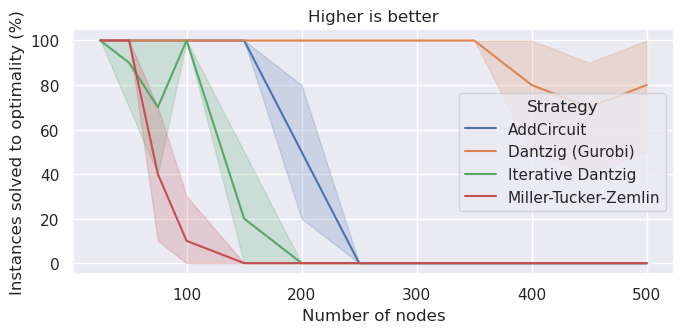

In [5]:
t = results.sort_values(["num_nodes", "instance_name"])
t = t[t["opt_tol"] == 0.001]
t["opt_perc"] = t["opt"] * 100
display(t.groupby(["num_nodes", "strategy"])[["opt_perc"]].mean())
plt.figure(figsize=(7, 3.5))
t.rename(columns={"strategy": "Strategy"}, inplace=True)
sns.lineplot(
    data=t.sort_values("Strategy"), x="num_nodes", y="opt_perc", hue="Strategy"
)
plt.ylabel("Instances solved to optimality (%)")
plt.xlabel("Number of nodes")
plt.title("Higher is better")
plt.tight_layout()
plt.savefig(PUBLIC_DATA / "solved_over_size.png")
plt.show()

However, getting nearly optimal solutions is often signficantly easier than getting optimal solutions.
For this reason, we may also want to check if the performance changes when we relax the optimality tolerance.
Often, the data is inaccurate anyway, such that a 5% or even 20% optimality gap can be acceptable.
We actually see that the `CpSatTspSolvingMtz` is better than `CpSatTspSolvingDantzig` for a 20% optimality gap.
Also the `CpSatTspSolvingV1` model can solve significantly larger models if we relax the optimality tolerance.

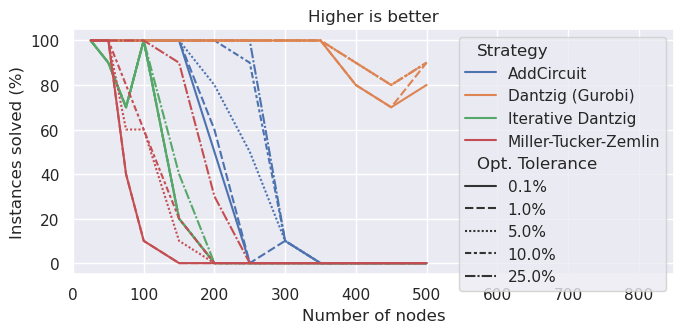

In [6]:
# Same plot but this time use the best lower bound available for each instance.
opt_gaps = [0.001, 0.01, 0.05, 0.1, 0.25]
data = []
for opt_gap in opt_gaps:
    t = results[results["opt_tol"] == 0.001].copy()
    t["opt_gap"] = (t["objective"] - t["lower_bound"]) / t["lower_bound"]
    t["succ"] = t["opt_gap"] <= opt_gap
    t["Opt. Tolerance"] = f"{100*opt_gap}%"
    t["opt_tol"] = opt_gap
    data.append(t)
t = pd.concat(data)
t["succ_perc"] = t["succ"] * 100
plt.figure(figsize=(7, 3.5))
t.rename(columns={"strategy": "Strategy"}, inplace=True)
sns.lineplot(
    data=t.sort_values(["Strategy", "opt_tol"]),
    x="num_nodes",
    y="succ_perc",
    hue="Strategy",
    style="Opt. Tolerance",
    errorbar=None,
)
plt.ylabel("Instances solved (%)")
plt.xlabel("Number of nodes")
plt.xlim(0, 850)
plt.title("Higher is better")
plt.tight_layout()
plt.savefig(PUBLIC_DATA / "solved_over_size_opt_tol.png")
plt.show()

A further point to consider is that the optimality gap is always calculated based on the own lower bound.
If we need solutions with a quality estimate, this is the way to go.
If we do not need the quality estimate, we can also use the best lower bound of all solvers to get a better estimate on the real optimality gap.
This is what we do in the next section.
The decision on which bound to use depends on the use case.

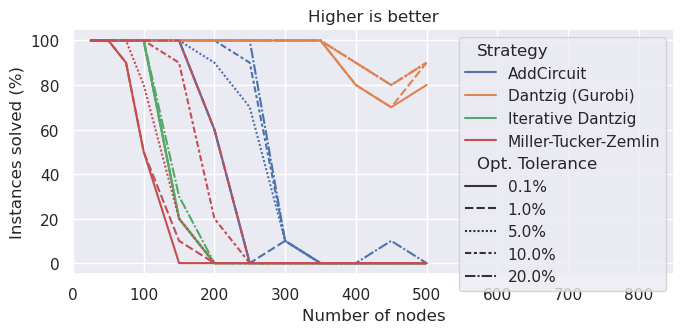

In [7]:
# Same plot but this time use the best lower bound available for each instance.
opt_gaps = [0.001, 0.01, 0.05, 0.1, 0.2]
data = []
best_lb = results.groupby(["instance_name"])[["lower_bound"]].max().reset_index()
for opt_gap in opt_gaps:
    t = (
        results[results["opt_tol"] == 0.001]
        .merge(best_lb, on="instance_name", suffixes=("", "_best_lb"))
        .copy()
    )
    t["opt_gap"] = (t["objective"] - t["lower_bound_best_lb"]) / t[
        "lower_bound_best_lb"
    ]
    t["succ"] = t["opt_gap"] <= opt_gap
    t["Opt. Tolerance"] = f"{100*opt_gap}%"
    t["opt_tol"] = opt_gap
    data.append(t)
t = pd.concat(data)
t["succ_perc"] = t["succ"] * 100
plt.figure(figsize=(7, 3.5))
t.rename(columns={"strategy": "Strategy"}, inplace=True)
sns.lineplot(
    data=t.sort_values(["Strategy", "opt_tol"]),
    x="num_nodes",
    y="succ_perc",
    hue="Strategy",
    style="Opt. Tolerance",
    errorbar=None,
)
plt.ylabel("Instances solved (%)")
plt.xlabel("Number of nodes")
plt.xlim(0, 850)
plt.title("Higher is better")
plt.tight_layout()
plt.savefig(PUBLIC_DATA / "solved_over_size_opt_tol_best_lb.png")
plt.show()

## Comparing on unstructured benchmarks

The line plots above need a well structured benchmark to compute reliable data points.
If you do not have such a benchmark, you may want to go for the following plot which shows how many instances of the benchmark could be solved within a given time limit.
This also gives an insight into how fast the model can deal with simple instances.
In this specific case, we see that the `CpSatTspSolvingMtz` can solve more instances than `CpSatTspSolvingDantzig`, but `CpSatTspSolvingDantzig` is usually faster for the instances it can solve.


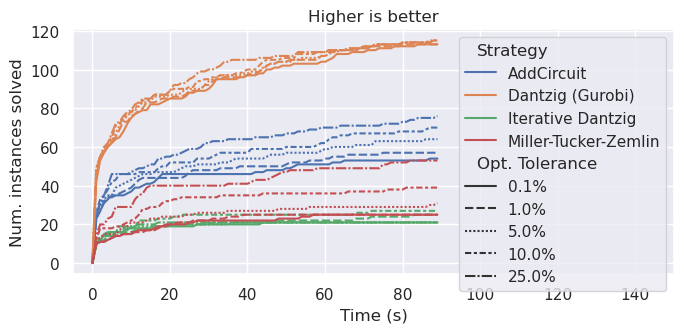

In [8]:
from _conf import TIME_LIMIT, OPTIMALITY_TOLERANCES

time_steps = [t_ for t_ in range(0, TIME_LIMIT)]
filtered_results = results[results["opt_gap"] <= 1.001 * results["opt_tol"]].copy()


def f(strategy, at_time, tol):
    t = filtered_results[filtered_results["strategy"] == strategy]
    t = t[t["runtime"] <= at_time]
    t = t[t["opt_tol"] == tol]
    t.drop_duplicates(subset=["instance_name"], inplace=True)
    return len(t)


data = {
    "Strategy": [],
    "x": [],
    "time": [],
    "Opt. Tolerance": [],
    "opt_tol": [],
}

for strateg in results["strategy"].unique().tolist():
    for time in time_steps:
        for tol in OPTIMALITY_TOLERANCES:
            data["Strategy"].append(strateg)
            data["x"].append(time)
            data["time"].append(f(strateg, time, tol))
            data["Opt. Tolerance"].append(f"{tol*100}%")
            data["opt_tol"].append(tol)
t = pd.DataFrame(data)
plt.figure(figsize=(7, 3.5))
sns.lineplot(
    data=t.sort_values(["Strategy", "opt_tol"]),
    x="x",
    y="time",
    hue="Strategy",
    style="Opt. Tolerance",
    errorbar=None,
)
plt.ylabel("Num. instances solved")
plt.xlim(-5, 150)
plt.xlabel("Time (s)")
plt.title("Higher is better")
plt.tight_layout()
plt.savefig(PUBLIC_DATA / "cactus_plot_opt_tol.png")
plt.show()

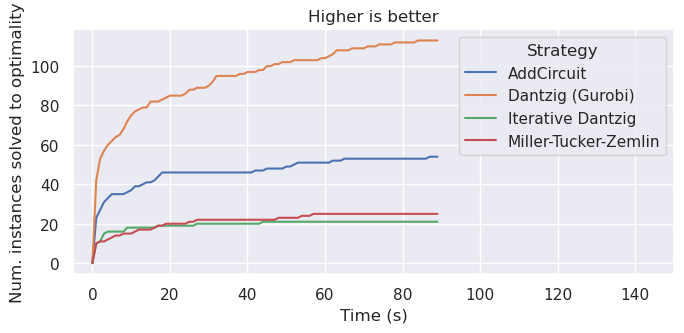

In [9]:
from _conf import TIME_LIMIT, OPTIMALITY_TOLERANCES

time_steps = [t_ for t_ in range(0, TIME_LIMIT)]
filtered_results = results[results["opt_gap"] <= 1.001 * results["opt_tol"]].copy()


def f(strategy, at_time, tol):
    t = filtered_results[filtered_results["strategy"] == strategy]
    t = t[t["runtime"] <= at_time]
    t = t[t["opt_tol"] == tol]
    t.drop_duplicates(subset=["instance_name"], inplace=True)
    return len(t)


data = {
    "Strategy": [],
    "x": [],
    "time": [],
    "Opt. Tolerance": [],
}

for strateg in results["strategy"].unique().tolist():
    for time in time_steps:
        for tol in OPTIMALITY_TOLERANCES[:1]:
            data["Strategy"].append(strateg)
            data["x"].append(time)
            data["time"].append(f(strateg, time, tol))
            data["Opt. Tolerance"].append(tol * 100)
t = pd.DataFrame(data)
plt.figure(figsize=(7, 3.5))
sns.lineplot(
    data=t.sort_values("Strategy"), x="x", y="time", hue="Strategy", errorbar=None
)
plt.ylabel("Num. instances solved to optimality")
plt.xlim(-5, 150)
plt.xlabel("Time (s)")
plt.title("Higher is better")
plt.tight_layout()
plt.savefig(PUBLIC_DATA / "cactus_plot.png")
plt.show()

In [10]:
results[results["opt_gap"] >= results["opt_tol"]]

,instance_name,num_nodes,time_limit,strategy,opt_tol,runtime,objective,lower_bound,opt_gap,opt
0,random_euclidean_100_3,100,90,Iterative Dantzig,0.100,90.111767,7.416302e+07,0.0,1.000000,False
1,random_euclidean_100_3,100,90,Iterative Dantzig,0.250,90.242522,7.416302e+07,18.0,1.000000,False
2,random_euclidean_100_3,100,90,Miller-Tucker-Zemlin,0.001,90.424638,7.564729e+07,72159364.0,0.046108,False
3,random_euclidean_100_3,100,90,Miller-Tucker-Zemlin,0.010,90.387232,7.416302e+07,71652903.0,0.033846,False
4,random_euclidean_100_3,100,90,Miller-Tucker-Zemlin,0.050,90.371634,7.742063e+07,72885906.0,0.058573,False
...,...,...,...,...,...,...,...,...,...,...
2335,random_euclidean_400_9,400,90,Miller-Tucker-Zemlin,0.010,157.327746,2.092240e+09,63258296.0,0.969765,False
2336,random_euclidean_400_9,400,90,Miller-Tucker-Zemlin,0.050,150.462334,2.071005e+09,63444508.0,0.969365,False
2337,random_euclidean_400_9,400,90,Miller-Tucker-Zemlin,0.100,161.027150,2.578843e+09,63785063.0,0.975266,False
2338,random_euclidean_400_9,400,90,Miller-Tucker-Zemlin,0.250,155.932914,1.974268e+09,63062886.0,0.968058,False
